In [1]:
#importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#loading dataset
wine = pd.read_csv('sk_dat.csv')

In [3]:
wine.head()

,&Reac_Pressure,Coolant_OutletTemp,T10,ColumnPC_OP,CondDuty_OutletTemp
0,29.9396,47.1669,182.235,47.6326,61.1599
1,29.4974,45.7063,182.218,47.2119,61.6422
2,29.1028,45.4970,182.275,48.3266,61.7470
3,28.8263,46.0931,182.318,49.5561,61.3308
4,28.6948,47.1695,182.296,49.5242,60.8892


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 5 columns):
&Reac_Pressure         1484 non-null float64
Coolant_OutletTemp     1484 non-null float64
T10                    1484 non-null float64
ColumnPC_OP            1484 non-null float64
CondDuty_OutletTemp    1484 non-null float64
dtypes: float64(5)
memory usage: 58.0 KB


In [5]:
wine.isnull().sum()

&Reac_Pressure         0
Coolant_OutletTemp     0
T10                    0
ColumnPC_OP            0
CondDuty_OutletTemp    0
dtype: int64

In [6]:
#preprocessing data
bins = (2, 59.9999, 62.2000)
group_names = ['bad', 'good']
wine['CondDuty_OutletTemp']=pd.cut(wine['CondDuty_OutletTemp'], bins=bins, labels=group_names)
wine['CondDuty_OutletTemp'].unique()

[good, bad]
Categories (2, object): [bad < good]

In [7]:
wine.loc[1140:1155]

,&Reac_Pressure,Coolant_OutletTemp,T10,ColumnPC_OP,CondDuty_OutletTemp
1140,29.1234,51.3815,182.062,46.4159,bad
1141,29.1314,51.4170,182.067,46.4014,bad
1142,29.1396,51.4453,182.077,46.5491,bad
1143,29.1473,51.4662,182.083,46.6414,bad
1144,29.1539,51.4804,182.081,46.5553,bad
1145,29.1592,51.4903,182.079,46.4289,bad
1146,29.1634,51.4982,182.085,46.4438,bad
1147,29.1664,51.5059,182.092,46.5814,bad
1148,29.1688,51.5152,182.098,46.6505,bad
1149,29.1709,51.5269,182.096,46.5738,good


In [8]:
label_quality = LabelEncoder()

In [9]:
label_quality

LabelEncoder()

In [10]:
wine['CondDuty_OutletTemp']=label_quality.fit_transform(wine['CondDuty_OutletTemp'])

In [11]:
wine.head()

,&Reac_Pressure,Coolant_OutletTemp,T10,ColumnPC_OP,CondDuty_OutletTemp
0,29.9396,47.1669,182.235,47.6326,1
1,29.4974,45.7063,182.218,47.2119,1
2,29.1028,45.4970,182.275,48.3266,1
3,28.8263,46.0931,182.318,49.5561,1
4,28.6948,47.1695,182.296,49.5242,1


In [12]:
wine['CondDuty_OutletTemp'].value_counts()

1    884
0    600
Name: CondDuty_OutletTemp, dtype: int64

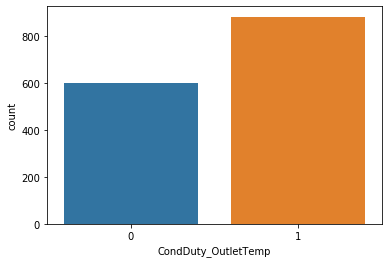

In [13]:
sns.countplot(wine['CondDuty_OutletTemp'])

In [14]:
#now seperate the dataset as response variable and feature variables
X=wine.drop('CondDuty_OutletTemp', axis=1)
y=wine['CondDuty_OutletTemp']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [16]:
#applying standard scaling to get optimuzed results
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [17]:
X_test

array([[-0.60715641,  0.85851758,  0.85890695, -0.79458464],
       [-0.1027188 ,  0.63684728,  0.79515675, -0.52604157],
       [ 1.00187276, -1.4283467 , -1.50965801,  1.2960498 ],
       ...,
       [ 0.75375608, -0.19604645,  0.14294322,  0.39523928],
       [-0.61212868,  0.86137153,  0.85400309, -0.83194011],
       [ 1.00212137, -1.4283467 , -1.50965801,  1.29396807]])

# Random Forest Classifier

In [18]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [19]:
pred_rfc[:20]

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [20]:
#lets see how our model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       123
           1       1.00      0.99      1.00       174

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297

[[123   0]
 [  1 173]]


In [21]:
wine2 = pd.read_csv('sk_dat.csv')

In [22]:
wine2.describe()

,&Reac_Pressure,Coolant_OutletTemp,T10,ColumnPC_OP,CondDuty_OutletTemp
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,29.753892,47.849290,182.080792,48.314188,59.835145
std,0.402485,4.800060,0.203852,0.870648,2.534384
min,27.320100,40.948700,181.717000,46.382900,55.784700
25%,29.513200,41.145525,181.821750,47.607675,56.636750
50%,29.515700,51.242100,182.212500,47.857350,61.331550
75%,30.163700,51.940000,182.255000,49.408825,62.076950
max,30.365200,52.237100,182.318000,50.190200,62.111600


In [23]:
sc2=StandardScaler()

In [26]:
p = pd.DataFrame(sc2.fit_transform(wine2))

In [27]:
p.describe()

,0,1,2,3,4
count,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03
mean,-1.089410e-14,1.137305e-15,1.314865e-13,7.667721e-15,-4.913709e-15
std,1.000337e+00,1.000337e+00,1.000337e+00,1.000337e+00,1.000337e+00
min,-6.048945e+00,-1.438090e+00,-1.785194e+00,-2.218967e+00,-1.598736e+00
25%,-5.982150e-01,-1.397071e+00,-1.271166e+00,-8.117531e-01,-1.262426e+00
50%,-5.920015e-01,7.070648e-01,6.463166e-01,-5.248873e-01,5.906401e-01
75%,1.018538e+00,8.525079e-01,8.548720e-01,1.257691e+00,8.848541e-01
max,1.519346e+00,9.144238e-01,1.164025e+00,2.155457e+00,8.985307e-01
